В данном проекте стоит задача обнаружения клиентов, которые планируют отказаться от услуг связи оператора  «ТелеДом».

<div style="border:solid green 2px; padding: 20px">
Анастасия, привет и хорошего дня! <br>
Меня зовут Сергей Дроздов, и я буду проверять твой проект. Предлагаю общаться на «ты». Если тебе удобнее общаться на "Вы", просто дай знать.

Ты уже проделала большую работу над проектом, но давай сделаем его еще лучше. Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Так будут выделены комментарии с указаниями, обязательными к выполнению. Без их выполнения проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Так будут выделены некритичные замечания. Их отработка позволит улучшить качество твоего проекта.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Так будут выделены остальные комментарии, полезные лайфхаки и ссылки на сторонние ресурсы </div>
    <br>
<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ревьюера:
</b> Так будут выделены итоговые комментарии.
</div>

Для наиболее эффективной и оперативной работы над проектом, мне хотелось бы иметь обратную связь. Не стесняйся задавать вопросы. Если ты что-либо меняешь в проекте, пожалуйста, комментируй это. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info">
<b> Комментарий студента:</div>

In [1]:
!pip install catboost

## Загрузка данных

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.utils import shuffle
from catboost import CatBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, RocCurveDisplay, roc_auc_score, precision_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [3]:
#!pip install phik
import phik
from phik.report import plot_correlation_matrix 

In [4]:
RANDOM_STATE = 301023

In [5]:
try:
    contract_new_raw = pd.read_csv('/datasets/contract_new.csv', index_col = [0])
except:
    contract_new_raw = pd.read_csv('https://code.s3.yandex.net/datasets/contract_new.csv',
                           index_col = [0])

try:
    personal_new_raw = pd.read_csv('/datasets/personal_new.csv', index_col = [0])
except:
    personal_new_raw = pd.read_csv('https://code.s3.yandex.net/datasets/personal_new.csv',
                           index_col = [0])

try:
    internet_new_raw = pd.read_csv('/datasets/internet_new.csv', index_col = [0])
except:
    internet_new_raw = pd.read_csv('https://code.s3.yandex.net/datasets/internet_new.csv',
                           index_col = [0])

try:
    phone_new_raw = pd.read_csv('/datasets/phone_new.csv', index_col = [0])
except:
    phone_new_raw = pd.read_csv('https://code.s3.yandex.net/datasets/phone_new.csv',
                           index_col = [0])

In [6]:
contract_new_raw

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.2
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.4
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.6


In [7]:
personal_new_raw

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No
...,...,...,...,...
6840-RESVB,Male,0,Yes,Yes
2234-XADUH,Female,0,Yes,Yes
4801-JZAZL,Female,0,Yes,Yes


In [8]:
internet_new_raw

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No
...,...,...,...,...,...,...,...
6840-RESVB,DSL,Yes,No,Yes,Yes,Yes,Yes
2234-XADUH,Fiber optic,No,Yes,Yes,No,Yes,Yes
4801-JZAZL,DSL,Yes,No,No,No,No,No


In [9]:
phone_new_raw

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes
...,...
2569-WGERO,No
6840-RESVB,Yes
2234-XADUH,Yes


## Исследовательский анализ и предобработка данных

Рассмотрим распределение признаков в каждом наборе и оценим их возможный вклад в модель.

### Contract

In [10]:
contract_new_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB


In [11]:
contract_new_raw.isnull().sum().sum()

0

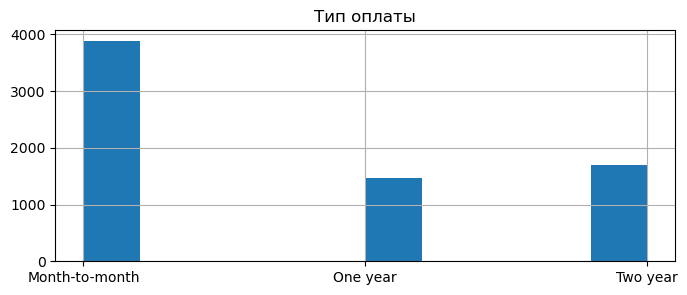

In [12]:
contract_new_raw['Type'].hist(figsize=(8, 3))
plt.title('Тип оплаты');

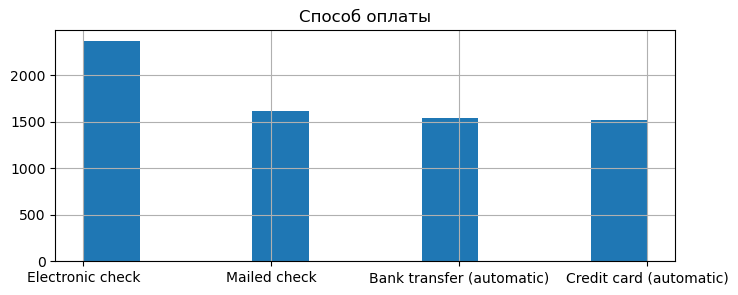

In [13]:
contract_new_raw['PaymentMethod'].hist(figsize=(8, 3))
plt.title('Способ оплаты');

Способ оплаты скорее всего не будет влиять на отказ от услуг оператора, а вот тип оплаты может стать важным признаком.

Изменим тип данных для дат на date, а также MonthlyCharges и TotalCharges на float.

In [14]:
contract_new_raw['BeginDate'] = pd.to_datetime(contract_new_raw['BeginDate'])

In [15]:
contract_new = contract_new_raw[contract_new_raw['TotalCharges'] != ' ']

In [16]:
contract_new[contract_new['TotalCharges'] == ' ']

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,


<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично!Можно было сразу использовать pd.to_numeric </div>

In [17]:
contract_new['TotalCharges'] = pd.to_numeric(contract_new['TotalCharges'], errors ='coerce')

/tmp/ipykernel_4510/753196309.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_new['TotalCharges'] = pd.to_numeric(contract_new['TotalCharges'], errors ='coerce')


Проверим пропущенные значения.

In [18]:
contract_new[contract_new['TotalCharges'].isnull()]

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,


Создадим новый признак на основании EndDate. Это будет целевая переменная - ушел ли клиент.

In [19]:
contract_new['EndDate'].describe()

count     7032
unique      67
top         No
freq      5931
Name: EndDate, dtype: object

In [20]:
contract_new['left'] = np.where(contract_new['EndDate'] == 'No', 0, 1)

/tmp/ipykernel_4510/3669923210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  contract_new['left'] = np.where(contract_new['EndDate'] == 'No', 0, 1)


<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично! Целевой признак определен! </div>

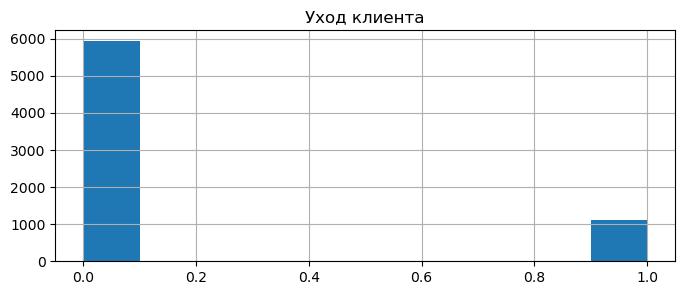

In [21]:
contract_new['left'].hist(figsize=(8, 3))
plt.title('Уход клиента');

Менять тип EndDate не будем, так как в дальнейшем удалим его из набора данных перед построением моделей.

In [22]:
contract_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   object        
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   left              7032 non-null   int64         
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 494.4+ KB


После изменения типов данных проверим как тип контракта влияет на ежемесячную и общую оплату.

In [23]:
contract_new.pivot_table(index='Type', values=['MonthlyCharges', 'TotalCharges'])

,MonthlyCharges,TotalCharges
Type,,
Month-to-month,66.398490,1327.380366
One year,65.079416,2746.401073
Two year,60.872374,3389.820386


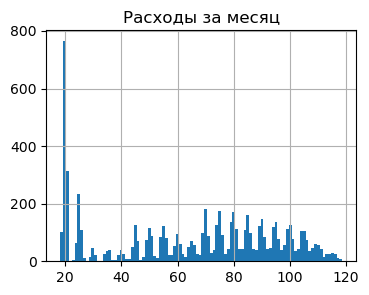

In [24]:
contract_new['MonthlyCharges'].hist(figsize=(4, 3), bins = 100)
plt.title('Расходы за месяц');

Мы видим пик около 20, возможно это месячная цена самого популярного тарифа.

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично! </div>

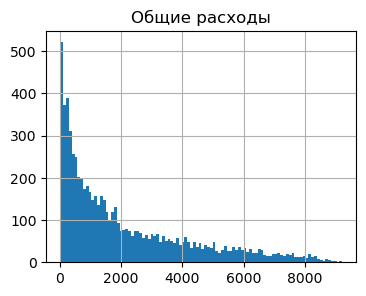

In [25]:
contract_new['TotalCharges'].hist(figsize=(4, 3), bins = 100)
plt.title('Общие расходы');

Общие расходы закономерно убывают, большая часть находится в промежутке от 0 до 2000.

### Personal

In [26]:
personal_new_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null   object
dtypes: int64(1), object(3)
memory usage: 275.1+ KB


In [27]:
personal_new_raw.isnull().sum().sum()

0

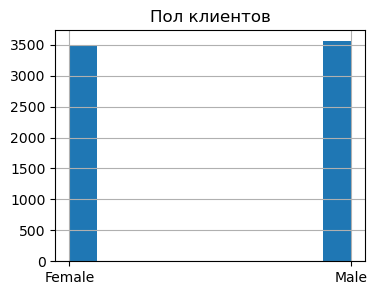

In [28]:
personal_new_raw['gender'].hist(figsize=(4, 3))
plt.title('Пол клиентов');

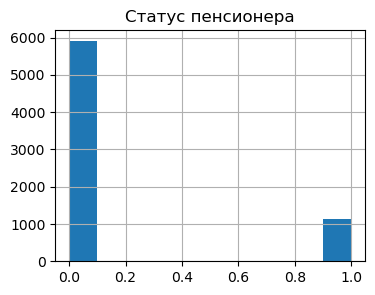

In [29]:
personal_new_raw['SeniorCitizen'].hist(figsize=(4, 3))
plt.title('Статус пенсионера');

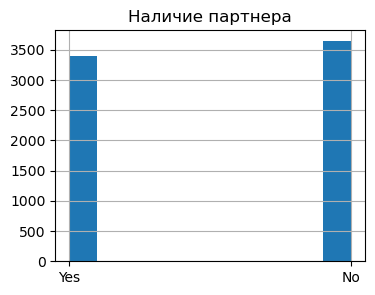

In [30]:
personal_new_raw['Partner'].hist(figsize=(4, 3))
plt.title('Наличие партнера');

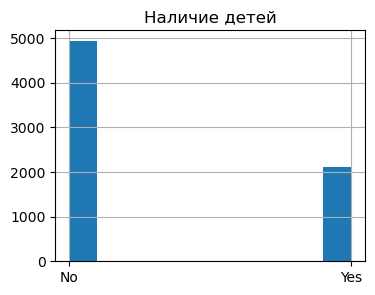

In [31]:
personal_new_raw['Dependents'].hist(figsize=(4, 3))
plt.title('Наличие детей');

В наборе personal у нас четыре переменные, две из которых (пол и наличие партнера) распределены равномерно. Пенсионеров в наборе закономерно меньше, как и клиентов с детьми.

### Internet

In [32]:
internet_new_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5517 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   InternetService   5517 non-null   object
 1   OnlineSecurity    5517 non-null   object
 2   OnlineBackup      5517 non-null   object
 3   DeviceProtection  5517 non-null   object
 4   TechSupport       5517 non-null   object
 5   StreamingTV       5517 non-null   object
 6   StreamingMovies   5517 non-null   object
dtypes: object(7)
memory usage: 344.8+ KB


In [33]:
internet_new_raw.isnull().sum().sum()

0

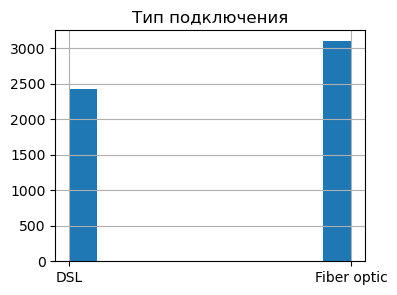

In [34]:
internet_new_raw['InternetService'].hist(figsize=(4, 3))
plt.title('Тип подключения');

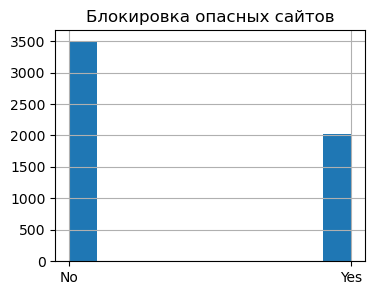

In [35]:
internet_new_raw['OnlineSecurity'].hist(figsize=(4, 3))
plt.title('Блокировка опасных сайтов');

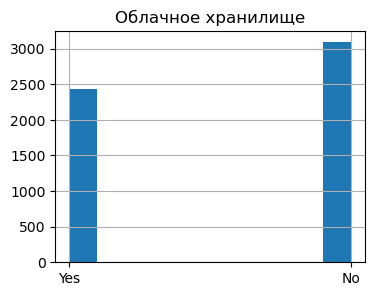

In [36]:
internet_new_raw['OnlineBackup'].hist(figsize=(4, 3))
plt.title('Облачное хранилище');

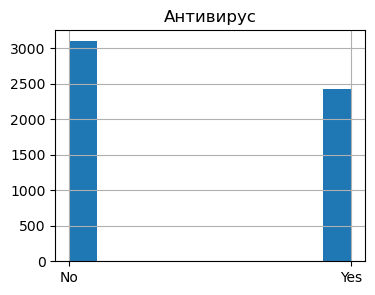

In [37]:
internet_new_raw['DeviceProtection'].hist(figsize=(4, 3))
plt.title('Антивирус');

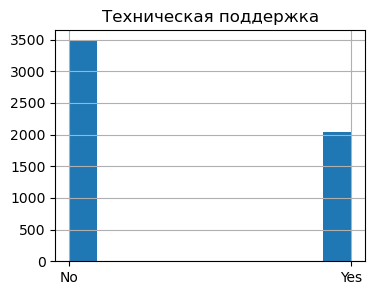

In [38]:
internet_new_raw['TechSupport'].hist(figsize=(4, 3))
plt.title('Техническая поддержка');

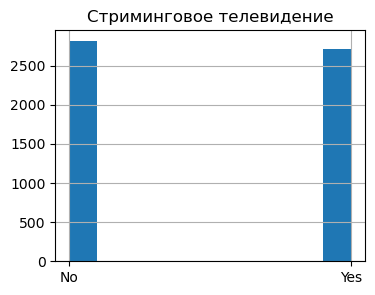

In [39]:
internet_new_raw['StreamingTV'].hist(figsize=(4, 3))
plt.title('Стриминговое телевидение');

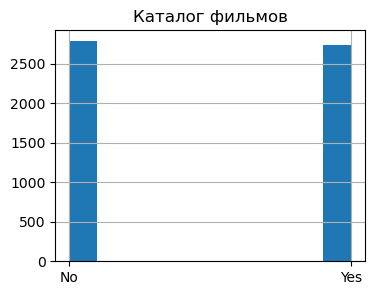

In [40]:
internet_new_raw['StreamingMovies'].hist(figsize=(4, 3))
plt.title('Каталог фильмов');

Из двух типов подключения чаще используется оптоволокно.

Что касается дополнительных услуг, пользуются популярностью только каталог фильмов и стриминговое телевидение. Остальные функции клиенты чаще игнорируют.

### Phone

In [41]:
phone_new_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6361 entries, 5575-GNVDE to 3186-AJIEK
Data columns (total 1 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   MultipleLines  6361 non-null   object
dtypes: object(1)
memory usage: 99.4+ KB


In [42]:
phone_new_raw.isnull().sum().sum()

0

## Объединение данных

Изменим названия столбцов на snake case.

In [43]:
data_raw = contract_new.copy()

In [44]:
data_raw = data_raw.join(personal_new_raw)
data_raw = data_raw.join(internet_new_raw)
data_raw = data_raw.join(phone_new_raw)

In [45]:
data_raw

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,left,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,2018-02-01,No,One year,Yes,Mailed check,84.80,2035.20,0,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Yes
2234-XADUH,2014-02-01,No,One year,Yes,Credit card (automatic),103.20,7430.40,0,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Yes
4801-JZAZL,2019-03-01,No,Month-to-month,Yes,Electronic check,29.60,325.60,0,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,NaN


In [46]:
#Код ревьюера
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   BeginDate         7032 non-null   datetime64[ns]
 1   EndDate           7032 non-null   object        
 2   Type              7032 non-null   object        
 3   PaperlessBilling  7032 non-null   object        
 4   PaymentMethod     7032 non-null   object        
 5   MonthlyCharges    7032 non-null   float64       
 6   TotalCharges      7032 non-null   float64       
 7   left              7032 non-null   int64         
 8   gender            7032 non-null   object        
 9   SeniorCitizen     7032 non-null   int64         
 10  Partner           7032 non-null   object        
 11  Dependents        7032 non-null   object        
 12  InternetService   5512 non-null   object        
 13  OnlineSecurity    5512 non-null   object        
 14  OnlineBackup  

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отлично!Данные объединены корректно! </div>

Проверим объединение по id одного из клиентов.

In [47]:
data_raw.loc[['8361-LTMKD']]

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,left,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,,
8361-LTMKD,2019-07-01,No,Month-to-month,Yes,Mailed check,74.4,520.8,0,Male,1,Yes,No,Fiber optic,No,No,No,No,No,No,Yes


In [48]:
personal_new_raw.loc[['8361-LTMKD']]

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
8361-LTMKD,Male,1,Yes,No


##  Исследовательский анализ и предобработка данных объединённого датафрейма

Доработаем объединенный датасет: заменим названия, поменяем типы данных и добавим новый признак. Затем посмотрим на распределение числовых признаков и их взаимосвязь.

In [49]:
data = data_raw.copy()

In [50]:
data.columns = (data.columns
                .str.replace('(?<=[a-z])(?=[A-Z])', '_', regex=True)
                .str.lower()
             )

In [51]:
data.head(5)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,left,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines
customerID,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,0,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   left               7032 non-null   int64         
 8   gender             7032 non-null   object        
 9   senior_citizen     7032 non-null   int64         
 10  partner            7032 non-null   object        
 11  dependents         7032 non-null   object        
 12  internet_service   5512 non-null   object        
 13  online_security    5512 non-null   object        
 14

В колонках из датасета с интернетом меньше наблюдений, так как не все клиенты им пользуются. Заменим пропущенные значения на No.

In [53]:
for column in ('internet_service', 'online_security', 'online_backup', 'device_protection',
               'tech_support', 'streaming_tv', 'streaming_movies', 'multiple_lines'):
    data[column] = data[column].fillna('No')

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Хорошо! </div>

In [54]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   begin_date         7032 non-null   datetime64[ns]
 1   end_date           7032 non-null   object        
 2   type               7032 non-null   object        
 3   paperless_billing  7032 non-null   object        
 4   payment_method     7032 non-null   object        
 5   monthly_charges    7032 non-null   float64       
 6   total_charges      7032 non-null   float64       
 7   left               7032 non-null   int64         
 8   gender             7032 non-null   object        
 9   senior_citizen     7032 non-null   int64         
 10  partner            7032 non-null   object        
 11  dependents         7032 non-null   object        
 12  internet_service   7032 non-null   object        
 13  online_security    7032 non-null   object        
 14

Добавим еще один признак - сколько дней клиент пользуется услугами оператора. Для этого сначала заменим отсутствие конечной даты датой выгрузки датасета (возьмемем ее из задания).

In [55]:
data['end_date'] = data['end_date'].replace(['No'], ['2020-02-01'])
data[data['end_date'] == 'No'].count().sum()

0

In [56]:
data['end_date'] = pd.to_datetime(data['end_date'])
data['duration_days'] = (data['end_date'] - data['begin_date']).dt.days

<div class="alert alert-success">
<b>Комментарий ревьюера:
&#9989;</b> Отличный признак!</div>

In [57]:
data.head(5)

,begin_date,end_date,type,paperless_billing,payment_method,monthly_charges,total_charges,left,gender,senior_citizen,...,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,streaming_movies,multiple_lines,duration_days
customerID,,,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,2020-02-01,Month-to-month,Yes,Electronic check,29.85,31.04,0,Female,0,...,No,DSL,No,Yes,No,No,No,No,No,31
5575-GNVDE,2017-04-01,2020-02-01,One year,No,Mailed check,56.95,2071.84,0,Male,0,...,No,DSL,Yes,No,Yes,No,No,No,No,1036
3668-QPYBK,2019-10-01,2020-02-01,Month-to-month,Yes,Mailed check,53.85,226.17,0,Male,0,...,No,DSL,Yes,Yes,No,No,No,No,No,123
7795-CFOCW,2016-05-01,2020-02-01,One year,No,Bank transfer (automatic),42.30,1960.60,0,Male,0,...,No,DSL,Yes,No,Yes,Yes,No,No,No,1371
9237-HQITU,2019-09-01,2020-02-01,Month-to-month,Yes,Electronic check,70.70,353.50,0,Female,0,...,No,Fiber optic,No,No,No,No,No,No,No,153


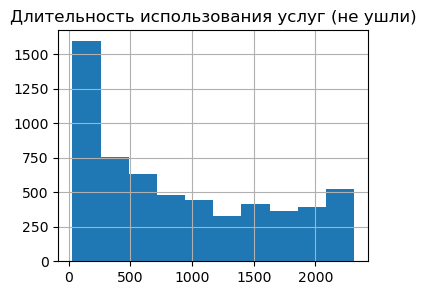

In [58]:
data.loc[data['left'] == 0, ['duration_days']].hist(figsize=(4, 3))
plt.title('Длительность использования услуг (не ушли)');

In [59]:
data.loc[data['left'] == 0, ['duration_days']].describe()

,duration_days
count,5931.000000
mean,895.338560
std,716.588322
min,31.000000
25%,245.000000
50%,702.000000
75%,1523.000000
max,2314.000000


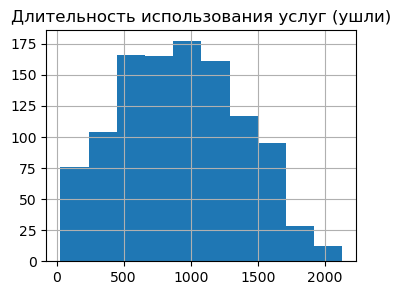

In [60]:
data.loc[data['left'] == 1, ['duration_days']].hist(figsize=(4, 3))
plt.title('Длительность использования услуг (ушли)');

In [61]:
data.loc[data['left'] == 1, ['duration_days']].describe()

,duration_days
count,1101.000000
mean,924.863760
std,458.771309
min,28.000000
25%,577.000000
50%,915.000000
75%,1249.000000
max,2129.000000


Среди тех, кто не уходил, большая часть клиентов использовала услуги от 245 до 1523 дней.


Из тех, кто прекратил использвание услуг оператора, большая часть клиентов ушли через 577 - 1249 дней.

## Подготовка данных

### Мультиколлинеарность

Проверим числовые признанаки на мультиколлинеарность.

In [66]:
numeric_columns = ['monthly_charges', 'total_charges', 'duration_days', 'left', 'senior_citizen']
data[numeric_columns].corr()

,monthly_charges,total_charges,duration_days,left,senior_citizen
monthly_charges,1.000000,0.630297,0.218955,0.153927,0.219874
total_charges,0.630297,1.000000,0.821442,0.051548,0.093383
duration_days,0.218955,0.821442,1.000000,0.015716,0.004384
left,0.153927,0.051548,0.015716,1.000000,0.056444
senior_citizen,0.219874,0.093383,0.004384,0.056444,1.000000


In [70]:
numeric_columns.append('begin_date')
numeric_columns.append('end_date')

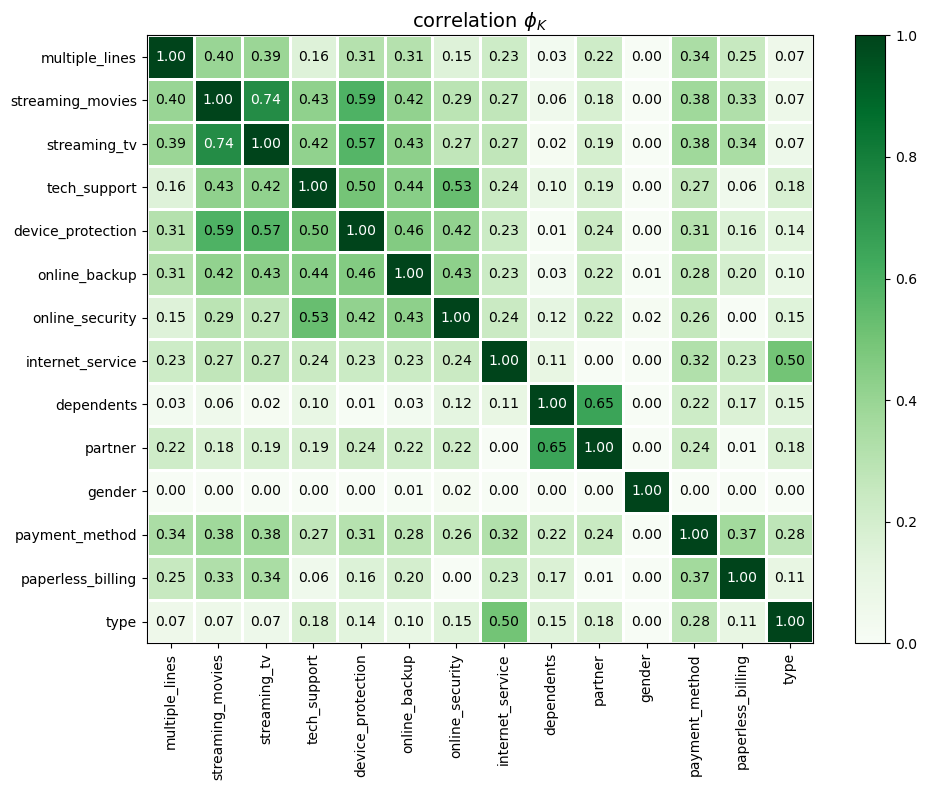

In [71]:
phik_overview = data.drop(columns = numeric_columns).phik_matrix() 
plot_correlation_matrix(phik_overview.values, x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, vmin=0, vmax=1, color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1, figsize=(10, 8)) 
plt.tight_layout()

У total_charges и duration_days присутствует проблема мультиколлинеарности. Ее можно было ожидать, так как логично, что чем дольше клиент использует услуги оператора, тем больше будут его общие расходы.

Также высокая корреляция у категориальных признаков streaming_tv и streaming_movies, поэтому оставим только первый.

Удалим признак total_charges и streaming_movies, а также признаки begin_date и end_date.

In [72]:
data = data.drop(columns=['total_charges', 'begin_date', 'end_date', 'streaming_movies'])

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Согласен насчет total_charges, также стоит добавить анализ на мультиколлинеарность категориальных признаков. Советую посмотреть в сторону использования библиотеки phik(отлично работает со смешанными типами данных и не требует кодирования)</div>

<div class="alert alert-info">
<b> Комментарий студента: </b> спасибо, добавила </div>

### Кодирование и мастштабирование

Выделим целевую переменную и признаки, а затем разделим датасет на обучающую и тестовую выборки.

In [73]:
target = data['left']
features = data.drop(columns=['left'])

In [74]:
features_train, features_test, target_train, target_test = train_test_split(features,
                                                                            target, test_size=0.25,
                                                                            random_state= RANDOM_STATE)

In [75]:
features

,type,paperless_billing,payment_method,monthly_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_tv,multiple_lines,duration_days
customerID,,,,,,,,,,,,,,,,
7590-VHVEG,Month-to-month,Yes,Electronic check,29.85,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,31
5575-GNVDE,One year,No,Mailed check,56.95,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,1036
3668-QPYBK,Month-to-month,Yes,Mailed check,53.85,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,123
7795-CFOCW,One year,No,Bank transfer (automatic),42.30,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,1371
9237-HQITU,Month-to-month,Yes,Electronic check,70.70,Female,0,No,No,Fiber optic,No,No,No,No,No,No,153
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6840-RESVB,One year,Yes,Mailed check,84.80,Male,0,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,730
2234-XADUH,One year,Yes,Credit card (automatic),103.20,Female,0,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,2191
4801-JZAZL,Month-to-month,Yes,Electronic check,29.60,Female,0,Yes,Yes,DSL,Yes,No,No,No,No,No,337


Теперь закодируем категориальные данные с помощью One-Hot Encoding, а для численных переменных проведем масштабирование.

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> По заданию test_size=0.25 </div>

<div class="alert alert-info">
<b> Комментарий студента:  </b> заменила </div>

In [76]:
numeric_columns = ['monthly_charges', 'duration_days', 'senior_citizen']

In [77]:
ohe_features = features_train.drop(columns = numeric_columns).columns

In [78]:
encoder_ohe = OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False)

encoder_ohe.fit(features_train[ohe_features])

/home/anastasia/anaconda3/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:828: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


OneHotEncoder(drop='first', handle_unknown='ignore', sparse=False,
              sparse_output=False)

In [79]:
features_train[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(features_train[ohe_features])

features_train = features_train.drop(ohe_features, axis=1)

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Не совсем так, кодирование, как и масштабирование, необходимо произовдить только после разбиения выборки </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:
⚠</b> Для OHE лучше использовать OneHotEncoder и только после разделения на выборки, т.к. get_dummies не вставить в пайплайны + могут быть ошибки в кодировании. При кодировании get_dummies после разбиения выборки придётся проверять, что получились одинаковые признаки и в одинаковом порядке(можно использовать конструкцию <code>final_train, final_test = train.align(test, join='inner', axis=1)</code> для приведения признаков к единому виду. OneHotEncoder может работать со значениями признака, которого не было в тестовой выборке, можно использовать в column_transformer, пайплайнах и т.д. Пример использования <a href = "https://colab.research.google.com/drive/1_gAMXcQKoCShB_l8FNtYEejMnosm9mvt?usp=sharing">OHE</a>. Так же без разделения выборки до кодирования возникает утечка в данных
</div>

<div class="alert alert-info">
<b> Комментарий студента:  </b>  исправлено </div>

In [80]:
scaler = StandardScaler()

scaler.fit(features_train[numeric_columns])

features_train[numeric_columns] = scaler.transform(features_train[numeric_columns])

In [81]:
features_train.head()

,monthly_charges,senior_citizen,duration_days,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,multiple_lines_Yes
customerID,,,,,,,,,,,,,,,,,,,,
9651-GTSAQ,1.373742,-0.433403,1.092204,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0
9809-IMGCQ,1.060820,2.307323,-1.226463,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
2302-ANTDP,1.751578,2.307323,0.868524,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
5174-ITUMV,1.350439,-0.433403,1.671140,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0
8212-DJRCH,0.849432,-0.433403,-1.089039,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


<div class="alert alert-warning">
<b>Комментарий ревьюера:
&#9888;</b> Метрика не чувствительна к дисбалансу, поэтому балансировать не нужно, это лишние вычисления
</div>

<div class="alert alert-info">
<b> Комментарий студента: </b> не очень поняла про нечувствительность к дисбалансу... </div>

## Обучение моделей машинного обучения

Для обчения мы используем модели RandomForestClassifier и CatBoostClassifier с кроссвалидацией. Балансируем классы в параметре class_weights

### RandomForestClassifier

In [82]:
%%time

param_grid = {
    'max_depth': [5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [2, 6, 10],
    'n_estimators': [10, 50]}

model = RandomForestClassifier(random_state=RANDOM_STATE)

search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train, target_train)

CPU times: user 25.7 s, sys: 51.9 ms, total: 25.7 s
Wall time: 25.7 s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=301023),
             param_grid={'max_depth': [5, 10, 20],
                         'min_samples_leaf': [2, 6, 10],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [10, 50]},
             scoring='roc_auc')

In [83]:
search.best_score_

0.8158607491089651

<div class="alert alert-danger">
<b>Комментарий ревьюера: &#10060; </b> Не совсем так, тестируем мы только итоговую модель, выбранную по результатам на кроссвалидации(search.best_score_) </div>

<div class="alert alert-info">
<b> Комментарий студента: </b> исправила </div>

### CatBoostClassifier

In [84]:
%%time
param_grid = {
    'learning_rate': [0.1, 0.3],
    'iterations': [50, 100],
    'l2_leaf_reg': [3, 9]
}

model = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0)

search = GridSearchCV(model, param_grid, cv=5, scoring='roc_auc')
search.fit(features_train, target_train)

CPU times: user 37.9 s, sys: 9.44 s, total: 47.3 s
Wall time: 9.15 s


GridSearchCV(cv=5,
             estimator=<catboost.core.CatBoostClassifier object at 0x7fa7107896f0>,
             param_grid={'iterations': [50, 100], 'l2_leaf_reg': [3, 9],
                         'learning_rate': [0.1, 0.3]},
             scoring='roc_auc')

In [85]:
search.best_score_

0.9015714022108785

In [86]:
search.best_params_

{'iterations': 100, 'l2_leaf_reg': 3, 'learning_rate': 0.3}

Обе модели показали достаточно высокий результат: 0.82 у RandomForestClassifier и 0.90 у CatBoostClassifier. Далее рассмотрим характеристики для CatBoostClassifier как у лучшей модели.

## Изучение лучшей модели

In [87]:
features_test[encoder_ohe.get_feature_names_out()] = encoder_ohe.transform(
    features_test[ohe_features])

features_test = features_test.drop(ohe_features, axis=1)

In [88]:
features_test[numeric_columns] = scaler.transform(features_test[numeric_columns])

features_test.head(5)

,monthly_charges,senior_citizen,duration_days,type_One year,type_Two year,paperless_billing_Yes,payment_method_Credit card (automatic),payment_method_Electronic check,payment_method_Mailed check,gender_Male,partner_Yes,dependents_Yes,internet_service_Fiber optic,internet_service_No,online_security_Yes,online_backup_Yes,device_protection_Yes,tech_support_Yes,streaming_tv_Yes,multiple_lines_Yes
customerID,,,,,,,,,,,,,,,,,,,,
8189-XRIKE,0.869406,2.307323,0.112692,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
0902-RFHOF,-1.489157,-0.433403,-0.289347,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8317-BVKSO,-1.490821,-0.433403,-0.688462,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0839-JTCUD,0.834452,-0.433403,1.625819,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0
8008-OTEZX,-1.504137,-0.433403,0.247192,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [89]:
model = CatBoostClassifier(random_state=RANDOM_STATE, verbose=0, iterations = 100, 
                           l2_leaf_reg = 3, learning_rate = 0.3)

model.fit(features_train, target_train)

In [90]:
predicted_probalities = model.predict_proba(features_test)[:, 1]

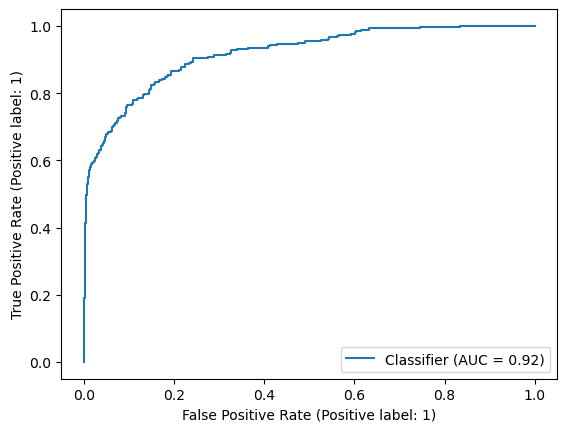

In [91]:
RocCurveDisplay.from_predictions(target_test, predicted_probalities);

In [92]:
roc_auc_score(target_test, predicted_probalities)

0.9179057639710985

In [93]:
predictions = model.predict(features_test)
cm = confusion_matrix(target_test, predictions, labels = model.classes_)

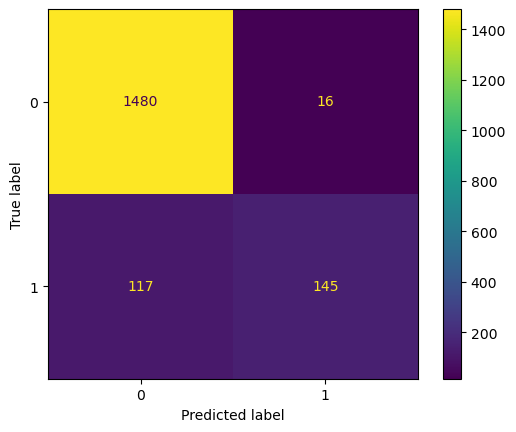

In [94]:
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = model.classes_)
disp.plot();

Метрика AUC ROC для модели CatBoostClassifier достигла 0.92. Посмотрим, какие признаки больше всего повлияли на предсказание.

In [95]:
important_features = pd.DataFrame(search.best_estimator_.feature_importances_,
                                index = features_test.columns, columns=['importances'])
important_features = important_features.sort_values(by='importances', ascending=False)
important_features

,importances
duration_days,54.913063
monthly_charges,10.987203
type_Two year,4.904122
partner_Yes,3.692868
multiple_lines_Yes,3.200464
type_One year,2.967672
payment_method_Mailed check,2.874850
dependents_Yes,2.274300
device_protection_Yes,2.202817
online_backup_Yes,2.196837


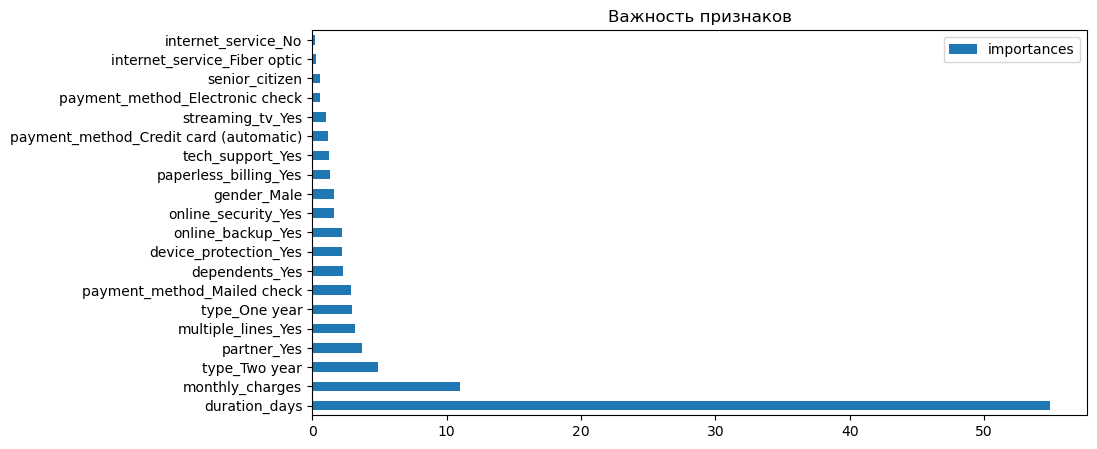

In [89]:
important_features.plot(kind='barh', figsize=(10, 5), title='Важность признаков')
plt.show();

Самый больший вклад в уход клиента вносит длительность пользования услугами оператора. На втором месте - расходы абонента за месяц. Все остальные признаки вносят очень маленький вклад в модель.

## Общий вывод и рекомендации заказчику

В данном проекте нашей задачей было построить модель, которая предсказывала бы разорвет ли абонент договор с оператором связи ТелеДом.

Для этого мы сначала изучили несколько наборов данных, которые содержали информацию о договоре, личной информации, а также об использовании интернет-услуг и услуг телефонии. Мы рассмотрели категориальные и численные признаки, изменили некоторые типы данных, проверили их на пропуски и объединили в один датасет.

Далее мы подготовили признаки и целевую переменную. Для кодирования категориальных признаков мы воспользовались методом OHE, а для численных провели масштабирование. Мы построили модели RandomForestClassifier и CatBoostClassifier, подобрав лучшие гиперпараметры с помощью GridSearchCV. Лучшую модель мы выбирали по метрике AUC ROC, ей стала модель CatBoostClassifier с гиперпараметрами скорость обучения 0.3, коэффициент при члене регуляризации L2 функции потерь 3 и максимальное количество построенных деревьев 100.

Самый большой вклад в модель вносит то, как долго клиент пользуется услугами оператора, а также то, сколько он платит в месяц. Поэтому возможно стоит вводить специальные предложения для тех клиентов, которые давно пользуются услугами оператора. Например, снижать стоимость месячной оплаты услуг.

<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;background:rgb(185, 176, 207)">
<b>Итоговый комментарий ревьюера V1:
</b> Молодец! Отличная работа! Давай исправим пару моментов, а именно:<br>
1. Анализ на мультиколлинеарность категориальных признаков<br>
2. Кодирование<br>
3. test_size=0.25<br>
4. Выбор итоговой модели и тестирование<br>
Также было бы неплохо добавить confusion_matrix итоговой модели. В отчете стоит добавить рекомендации для бизнеса.
</div>